In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import random
from sklearn.tree import DecisionTreeRegressor
import scipy.stats as st
from prettytable import PrettyTable

# ------------------------------------------------------------------------------------------------------------

# Task 1

In [4]:
a = load_boston()

columns = a['feature_names']

x = a['data']

target = a['target']

In [12]:
def compute_mse_and_oob_score():
    samples_x = []
    all_predicted_y = []

    oob_samples = []
    oob_predicted = []

    for i in range(30):
        sample_x = []
        sample_target = []
        oob_sample = []
        oob_target = []

        row_indices = random.sample(range(x.shape[0]) , 303)
        random_no_of_columns = random.randint(3,13)
        column_index = random.sample(range(0,13), random_no_of_columns)
        subindices = random.sample(range(len(row_indices)), 203)


        
        for j in subindices:
            row_indices.append(j)

        for k in row_indices:
            sample_x.append(x[k,column_index])
            sample_target.append(target[k])

        oob_indices = set([i for i in range(506)]).difference(set(row_indices))

        samples_x.append(sample_x)

        # ========================================OOB sample=========================================
        for k in oob_indices:
            oob_sample.append(x[k,column_index])
            oob_target.append(target[k])

        oob_samples.append(oob_sample)
  
        #=====================================Model on the samples====================================
        model = DecisionTreeRegressor()

        model.fit(sample_x , sample_target)  
        y_pred = np.array(model.predict(x[:,column_index]))

        all_predicted_y.append(y_pred)


        #==================================== Model on OOB samples=========================================

        model_oob = DecisionTreeRegressor()
        model_oob.fit(oob_sample , oob_target)
        y_pred_oob = np.array(model_oob.predict(x[:,column_index]))    

        oob_predicted.append(y_pred_oob)

    #==============================================compute the mse================================================
    
    final_pred = []
    for i in range(506):
        summation = 0 
        for j in range(30):
            summation += all_predicted_y[j][i]
        final_pred.append(1/30*summation)
        
    error = 0
    for i in range(506):
        error += (final_pred[i] - target[i])**2

    mse = 1/506*error    #oob_targets = []
    
    #============================================compute the oob score===========================================
    
    final_pred_oob = []
    for i in range(506):
        summation = 0
        for j in range(30):
            summation += oob_predicted[j][i]
        final_pred_oob.append(1/30*summation)
        
    error_oob = 0
    for i in range(506):
        error_oob += (final_pred_oob[i] - target[i])**2

    mse_oob = 1/506*error_oob    
    
    
    return mse , mse_oob

In [13]:
mse , oob_score = compute_mse_and_oob_score()
print("The mean squared error is: {}\n The oob score is: {}".format(mse,oob_score))

The mean squared error is: 1.6711521734326982
 The oob score is: 9.479448375359869


# Task 2

In [10]:
all_mse_scores = []
all_oob_scores = []

for i in range(30):
    mse , mse_oob = compute_mse_and_oob_score()
    all_mse_scores.append(mse)
    all_oob_scores.append(mse_oob)

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

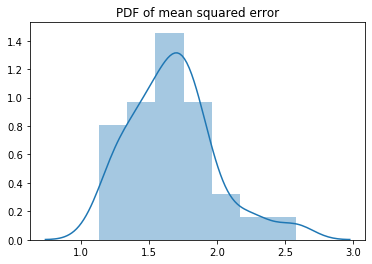

In [185]:
sns.distplot(all_mse_scores)
plt.title("PDF of mean squared error")
plt.show()

### Confidence interval of mse

In [189]:
all_mse_scores = np.array(all_mse_scores)

mean_mse = all_mse_scores.mean()
std_mse = np.std(all_mse_scores)

In [191]:
std_mse

0.3136380494866435

In [192]:
confidence_interval = (mean_mse + (std_mse/np.sqrt(35)* st.norm.ppf(0.025)) , mean_mse + (std_mse/np.sqrt(35)* st.norm.ppf(0.975)))

In [193]:
confidence_interval

(1.5689117560061812, 1.7767248023857356)

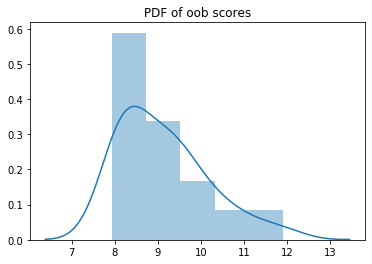

In [194]:
sns.distplot(all_oob_scores)
plt.title("PDF of oob scores")
plt.show()

### Confidence interval of oob_score

In [195]:
all_oob_scores = np.array(all_oob_scores)
mean_oob_score = all_oob_scores.mean()
std_oob_score = np.std(all_oob_scores)

In [196]:
confidence_interval_oob = (mean_oob_score + (std_oob_score/np.sqrt(35)* st.norm.ppf(0.025)) , mean_oob_score + (std_oob_score/np.sqrt(35)* st.norm.ppf(0.975)))

In [197]:
confidence_interval_oob

(8.787763618313212, 9.457115540829806)

In [202]:
x = PrettyTable()

x.field_names = ["Confidence interval mse", "Confidence interval of oob score"]

x.add_row([confidence_interval, confidence_interval_oob])

print(x)

+------------------------------------------+----------------------------------------+
|         Confidence interval mse          |    Confidence interval of oob score    |
+------------------------------------------+----------------------------------------+
| (1.5689117560061812, 1.7767248023857356) | (8.787763618313212, 9.457115540829806) |
+------------------------------------------+----------------------------------------+


# Task 3

In [ ]:
clf = DecisionTreeRegressor                                             

In [203]:
matrix = np.random.random_sample()